In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
url = 'http://www.popvortex.com/music/netherlands/top-songs.php'

In [3]:
response = requests.get(url)
response.status_code

200

In [4]:
soup = BeautifulSoup(response.content, "html.parser")

In [5]:
soup.select('#chart-position-1 > div.chart-content.col-xs-12.col-sm-8')

[<div class="chart-content col-xs-12 col-sm-8"><p class="title-artist"><cite class="title">Neem Er Één Van Mij</cite><em class="artist">Mart Hoogkamer</em></p><ul><li class="new-release"><a href="top-new-songs.php"><em>New Release</em></a></li><li><strong>Genre</strong>: Pop</li><li><strong>Release Date</strong>: 24-11-2021</li></ul><a aria-label="Stream Neem Er Één Van Mij - Mart Hoogkamer on Apple Music" class="buy-button button" href="https://music.apple.com/nl/album/neem-er-%C3%A9%C3%A9n-van-mij/1596519845?i=1596520091&amp;uo=2&amp;partnerId=11&amp;at=10l4UI&amp;app=music&amp;ct=music-songs" rel="nofollow noopener">Listen on Apple Music</a> <a aria-label="Buy Neem Er Één Van Mij - Mart Hoogkamer on iTunes" class="buy-button button" href="https://music.apple.com/nl/album/neem-er-%C3%A9%C3%A9n-van-mij/1596519845?i=1596520091&amp;uo=2&amp;partnerId=11&amp;at=10l4UI&amp;app=itunes&amp;ct=music-songs" rel="nofollow noopener">Buy on iTunes</a> <a aria-label="Buy Neem Er Één Van Mij - Mar

In [6]:
soup.cite.get_text()

'Neem Er Één Van Mij'

In [7]:
soup.em.get_text()

'Mart Hoogkamer'

In [8]:
soup.select('cite.title')[0]

<cite class="title">Neem Er Één Van Mij</cite>

In [9]:
soup.select('cite.title')[0].get_text()

'Neem Er Één Van Mij'

In [10]:
soup.select('em.artist')[0]

<em class="artist">Mart Hoogkamer</em>

In [11]:
title = []
artist = []

num_iter = len(soup.select('cite.title'))

for i in range(num_iter):
    title.append(soup.select('cite.title')[i].get_text())
    artist.append(soup.select('em.artist')[i].get_text())
    
print(title)
print(artist)

# each list becomes a column
songs = pd.DataFrame({"title":title,
                       "artist":artist,
                      })


['Neem Er Één Van Mij', 'Easy On Me', 'Waterval', 'Do It To It (feat. Cherish)', 'Cold Heart (PNAU Remix)', 'New Tattoo', 'Wishes Come True', 'Dat Heb Jij Gedaan', 'Amsterdam', 'Thunder', "Non Stop Vol D'r Op", 'Only You', 'Vluchtstrook', 'Pepas', 'Ons Moeder Zeej Nog', 'Shivers', 'Misschien Huil Ik Niet Hard Genoeg', 'The Motto', 'Baby Lekker Ding', 'Overpass Graffiti', 'Where Are You Now', 'My Universe', 'Hard To Say Goodbye', 'Hold Me', 'Sweet Talker', 'Voor Je Van Me Houdt', 'Nothing Else Matters', 'Una Mattina', 'Always Remember Us This Way', 'Ik Ga Zwemmen', 'Bad Habits', 'Blijven Slapen', 'Schiddi Widdi Witt', 'Bon Gepakt (feat. Rene Froger)', 'Mañana', 'Everybody Needs Somebody To Love', 'Sebastian', 'Alle Remmen Los', 'Everywhere (BBC Children In Need)', 'Visiting Hours', 'Talk About', 'Hold On', 'Wij Gaan Door', 'Santé', 'Sunshine', 'Grind (feat. Chivv & Murda)', 'Instructie', 'Hello Santa', 'Someone Like You', 'Hello', 'All I Want For Christmas Is You', 'Sorry', 'Happy Birth

In [12]:
url = 'http://www.popvortex.com/charts/australia.php'
# top 100 songs in Australia

In [13]:
response1 = requests.get(url)
response1.status_code

200

In [14]:
spoon = BeautifulSoup(response1.content, "html.parser")
spoon.select('#chart-position-1 > div.chart-content.col-xs-12.col-sm-8')

[]

In [15]:
title1 = []
artist1 = []

num_iter = len(spoon.select('cite.title'))

for i in range(num_iter):
    title1.append(spoon.select('cite.title')[i].get_text())
    artist1.append(spoon.select('em.artist')[i].get_text())
    
print(title1)
print(artist1)

# each list becomes a column
songs1 = pd.DataFrame({"title":title1,
                       "artist":artist1,
                      })

[]
[]


In [16]:
songs1.head(5)

,title,artist


In [17]:
top_songs = pd.concat([songs, songs1], axis=0).reset_index()
top_songs

,index,title,artist
0,0,Neem Er Één Van Mij,Mart Hoogkamer
1,1,Easy On Me,Adele
2,2,Waterval,K3
3,3,Do It To It (feat. Cherish),Acraze
4,4,Cold Heart (PNAU Remix),Elton John & Dua Lipa
...,...,...,...
95,95,Franse Auto,Het Goede Doel
96,96,The Defenders Main Title,John Paesano
97,97,Love Till It's Over (Hit the Bass Remix) [feat...,Housetwins
98,98,Asteroid 4179 - Toutatis,Berliner Philharmoniker & Sir Simon Rattle


In [18]:
top_songs = top_songs.drop(['index'], axis=1)

In [19]:
top_songs

,title,artist
0,Neem Er Één Van Mij,Mart Hoogkamer
1,Easy On Me,Adele
2,Waterval,K3
3,Do It To It (feat. Cherish),Acraze
4,Cold Heart (PNAU Remix),Elton John & Dua Lipa
...,...,...
95,Franse Auto,Het Goede Doel
96,The Defenders Main Title,John Paesano
97,Love Till It's Over (Hit the Bass Remix) [feat...,Housetwins
98,Asteroid 4179 - Toutatis,Berliner Philharmoniker & Sir Simon Rattle


In [20]:
from random import randint

def songs (data=top_songs):
    song =  str(input("search songs or artist you are intrested: "))
    for i in range(len(top_songs)):
        # if it is a song and it's in our list, then recommend another song from the list
        if top_songs['title'][i] == song:
            rand_number = randint(0,len(top_songs))
            return(print("I would recommend you to listen to: \"", top_songs['title'][rand_number], "\" by", top_songs['artist'][rand_number]))
        # if it is an artist and it's in our list, then recommend another song from the list
        elif top_songs['artist'][i] == song:
            rand_number = randint(0,len(top_songs))
            return(print("I would recommend you to listen to: \"", top_songs['title'][rand_number], "\" by", top_songs['artist'][rand_number]))
    return ("Not in the list")
songs()

search songs or artist you are intrested: Adele
I would recommend you to listen to: " Visiting Hours " by Ed Sheeran


In [21]:
#import spotipy
#from spotipy.oauth2 import SpotifyClientCredentials
#Initialize SpotiPy with user credentials
#sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='<your client id here>',
#                                                           client_secret='<your client secret here>'))


In [22]:
playlist = sp.user_playlist_tracks("spotify", "0BUNSGihi2mrhQu3fPcVim")

In [23]:
playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [24]:
playlist["items"][0]["track"]["name"]

'Rainbow Connection'

In [25]:
playlist['total']

815

In [26]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

In [28]:
all_tracks = get_playlist_tracks("0BUNSGihi2mrhQu3fPcVim")
len(all_tracks)

815

In [29]:
def uri(all_tracks):
    uri=[all_tracks[i]['track']['uri'] for i in range(len(all_tracks))]
    return uri
all_uri = uri(all_tracks)

In [30]:
complete_all_uri = pd.DataFrame(all_uri, columns=['uri'])

In [31]:
complete_all_uri.shape

(815, 1)

In [32]:
def artists(all_tracks):
    uri=[all_tracks[i]['track']['artists'][0]['name'] for i in range(len(all_tracks))]
    return artist
all_artists = artists(all_tracks)

In [33]:
complete_all_artists= pd.DataFrame(all_artists, columns=['artist'])
# complete_all_artists

In [34]:
def track_names(all_tracks):
    names=[all_tracks[i]['track']['name'] for i in range(len(all_tracks))]
    return names
all_track_names = track_names(all_tracks)

In [35]:
complete_track_names= pd.DataFrame(all_track_names, columns=['album'])

In [36]:
audio_features = [sp.audio_features(i) for i in (all_uri)]

In [37]:
def flatten(input_list):
    return [item for sublist in input_list for item in sublist]

In [38]:
features_new = flatten(audio_features)

In [39]:
danceability = [features_new[i]['danceability'] for i in range(len(features_new))]
energy = [features_new[i]['energy'] for i in range(len(features_new))]
key = [features_new[i]['key'] for i in range(len(features_new))]
loudness = [features_new[i]['loudness'] for i in range(len(features_new))]
mode = [features_new[i]['mode'] for i in range(len(features_new))]
speechiness = [features_new[i]['speechiness'] for i in range(len(features_new))]
acousticness = [features_new[i]['acousticness'] for i in range(len(features_new))]
instrumentalness = [features_new[i]['instrumentalness'] for i in range(len(features_new))]
liveness = [features_new[i]['liveness'] for i in range(len(features_new))]
valence = [features_new[i]['valence'] for i in range(len(features_new))]
tempo = [features_new[i]['tempo'] for i in range(len(features_new))]

In [40]:
complete_features = pd.DataFrame.from_dict({'danceability':danceability, 'energy':energy, 'key':key, 'loudness':loudness, 'mode':mode, 'speechiness':speechiness, 'acousticness':acousticness, 'instrumentalness':instrumentalness, 'liveness':liveness, 'valence':valence, 'tempo':tempo})
# complete_features

In [41]:
all_top_songs =pd.concat([complete_track_names,complete_all_artists,complete_all_uri,complete_features], axis=1)
all_top_songs

,album,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Rainbow Connection,Mart Hoogkamer,spotify:track:1SJ4ycWow4yz6z4oFz8NAG,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936
1,Somewhere Over The Rainbow_What A Wonderful World,Adele,spotify:track:25U7raB3ZSszayTYClh4hF,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005
2,What a Wonderful World,K3,spotify:track:04cdEVbQPb8BJb7593e5fO,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044
3,One Day / Reckoning Song (Wankelmut Remix) [Ra...,Acraze,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012
4,What A Wonderful World - Single Version,Elton John & Dua Lipa,spotify:track:2pp3RfqX5cb1BAnmNi4Nej,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,The Loophole,NaN,spotify:track:6B89ADIwxCw60PHZN6Kdp4,0.569,0.367,5,-5.178,1,0.0878,0.86200,0.000155,0.3370,0.823,169.768
811,Major Tom (Coming Home) - Adam K & Soha Radio ...,NaN,spotify:track:7nXXIXFSyDDPlfzCW9bdAa,0.732,0.764,10,-6.503,0,0.0631,0.16200,0.346000,0.3220,0.685,132.019
812,The Wreck of the Edmund Fitzgerald,NaN,spotify:track:536L9C0N7vhYdibCJx3cI2,0.308,0.376,4,-15.240,1,0.0626,0.11600,0.000003,0.1660,0.158,186.047
813,Fortune Soul,NaN,spotify:track:2eTjkXxxssJeR3u586CMkI,0.536,0.642,5,-6.479,0,0.0434,0.06400,0.356000,0.1050,0.193,138.914


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [43]:
cluster=all_top_songs.drop(['artist','album','uri'],axis=1)

In [44]:
scaler=StandardScaler().fit(cluster)
X_prep=scaler.transform(cluster)

In [45]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=3, random_state=1234)

In [46]:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     42
1    488
2    285
dtype: int64

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

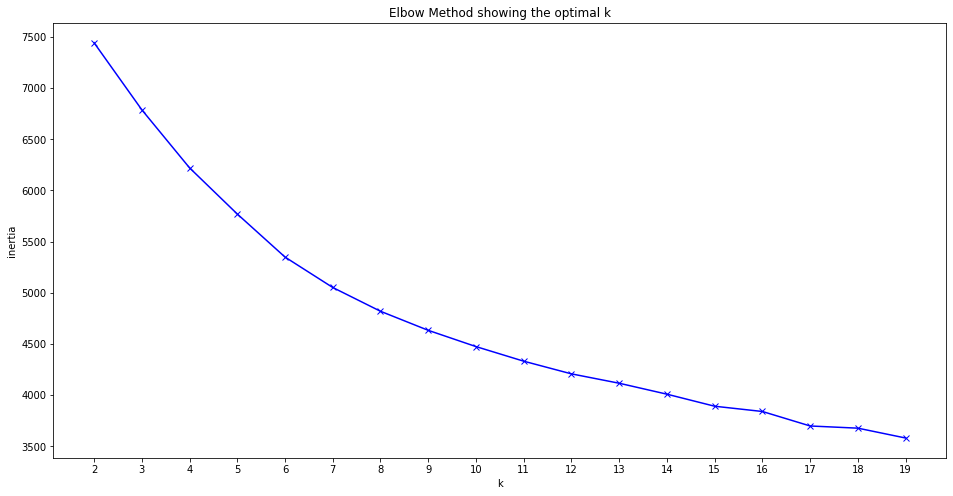

In [47]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

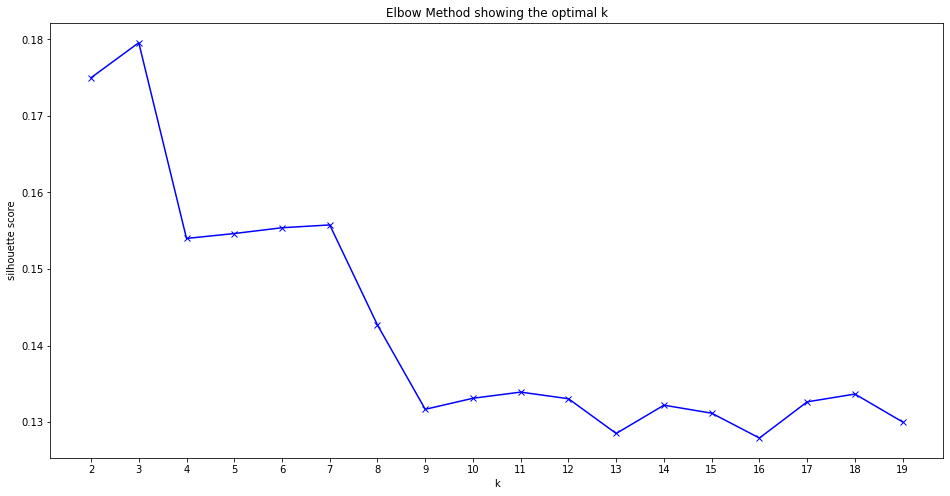

In [48]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [49]:
top_songs

,title,artist
0,Neem Er Één Van Mij,Mart Hoogkamer
1,Easy On Me,Adele
2,Waterval,K3
3,Do It To It (feat. Cherish),Acraze
4,Cold Heart (PNAU Remix),Elton John & Dua Lipa
...,...,...
95,Franse Auto,Het Goede Doel
96,The Defenders Main Title,John Paesano
97,Love Till It's Over (Hit the Bass Remix) [feat...,Housetwins
98,Asteroid 4179 - Toutatis,Berliner Philharmoniker & Sir Simon Rattle


In [50]:
all_top_songs['album'] = all_top_songs['album'].str.lower()
all_top_songs = all_top_songs.rename(columns={'album':'song_title',})

In [51]:
df_names_only = all_top_songs.drop(['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo'], axis=1)
df_names_only.head()

,song_title,artist,uri
0,rainbow connection,Mart Hoogkamer,spotify:track:1SJ4ycWow4yz6z4oFz8NAG
1,somewhere over the rainbow_what a wonderful world,Adele,spotify:track:25U7raB3ZSszayTYClh4hF
2,what a wonderful world,K3,spotify:track:04cdEVbQPb8BJb7593e5fO
3,one day / reckoning song (wankelmut remix) [ra...,Acraze,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu
4,what a wonderful world - single version,Elton John & Dua Lipa,spotify:track:2pp3RfqX5cb1BAnmNi4Nej


In [52]:
clust = all_top_songs.drop(['song_title', 'artist','uri'], axis=1)
clust.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936
1,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005
2,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044
3,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012
4,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894


In [53]:
cluster_df = pd.concat([clust,pd.Series(clusters)],axis=1)
cluster_df = cluster_df.rename(columns={0:'cluster'})

In [54]:
top_clustering = pd.concat([df_names_only, cluster_df],axis=1) # spotify database
# top_songs - hot songs database (100)

In [55]:
top_songs.to_csv("top100.csv", index=False)
top_clustering.to_csv('top_clustering.csv', index=False)

In [56]:
top_songs=pd.read_csv("top100.csv")
top_songs 

,title,artist
0,Neem Er Één Van Mij,Mart Hoogkamer
1,Easy On Me,Adele
2,Waterval,K3
3,Do It To It (feat. Cherish),Acraze
4,Cold Heart (PNAU Remix),Elton John & Dua Lipa
...,...,...
95,Franse Auto,Het Goede Doel
96,The Defenders Main Title,John Paesano
97,Love Till It's Over (Hit the Bass Remix) [feat...,Housetwins
98,Asteroid 4179 - Toutatis,Berliner Philharmoniker & Sir Simon Rattle


In [57]:
spotify_songs=pd.read_csv("top_clustering.csv")
spotify_songs

,song_title,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,rainbow connection,Mart Hoogkamer,spotify:track:1SJ4ycWow4yz6z4oFz8NAG,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936,2
1,somewhere over the rainbow_what a wonderful world,Adele,spotify:track:25U7raB3ZSszayTYClh4hF,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005,2
2,what a wonderful world,K3,spotify:track:04cdEVbQPb8BJb7593e5fO,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044,1
3,one day / reckoning song (wankelmut remix) [ra...,Acraze,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012,1
4,what a wonderful world - single version,Elton John & Dua Lipa,spotify:track:2pp3RfqX5cb1BAnmNi4Nej,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,the loophole,NaN,spotify:track:6B89ADIwxCw60PHZN6Kdp4,0.569,0.367,5,-5.178,1,0.0878,0.86200,0.000155,0.3370,0.823,169.768,2
811,major tom (coming home) - adam k & soha radio ...,NaN,spotify:track:7nXXIXFSyDDPlfzCW9bdAa,0.732,0.764,10,-6.503,0,0.0631,0.16200,0.346000,0.3220,0.685,132.019,1
812,the wreck of the edmund fitzgerald,NaN,spotify:track:536L9C0N7vhYdibCJx3cI2,0.308,0.376,4,-15.240,1,0.0626,0.11600,0.000003,0.1660,0.158,186.047,2
813,fortune soul,NaN,spotify:track:2eTjkXxxssJeR3u586CMkI,0.536,0.642,5,-6.479,0,0.0434,0.06400,0.356000,0.1050,0.193,138.914,1


In [ ]:
new_song = input("Enter a song: ")
new_artist = input("Enter an artist: ")

next = 'y'
# take the title and artist and conduct a search on spotify
    # searchphrase = new_song + ' - ' + new_artist
    if top_songs[(top_songs['title'] == song_title) & (top_songs['artist'] == song_artist)].count()[0] > 0:    
    rand_song = top_songs[(top_songs['title'] != song_title) & (top_songs['artist'] != song_artist)].iloc[random.choice(top_songs.index)]
    new_song = rand_song[0] + ' - ' + rand_song[1]
    print('top song entered, why don\'t you try this one then:')
    print('\033[1;32m', new_song)
    sleep(1)
    next = input('Would you like another recommendation? (y/n)')
    while next == 'y':
        rand_song = hot_songs[(hot_songs['title'] != song_title) & (hot_songs['artist'] != song_artist)].iloc[random.choice(hot_songs.index)]
        new_song = rand_song[0] + ' - ' + rand_song[1]
        print('\033[1;32m', new_song)
        sleep(1)
        next = input('Would you like another recommendation? (y/n)')
        
else: # Alternatively, we search in spotify
    import spotipy
    from spotipy.oauth2 import SpotifyClientCredentials

    secrets_file = open("top_clustering.csv","r")
    string = secrets_file.read()

    secrets_dict={}
    for line in string.split('\n'):
        if len(line) > 0:
            secrets_dict[line.split(':')[0]]=line.split(':')[1]

    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'], client_secret=secrets_dict['csecret']))

    # Getting the song's features
    search = song_artist +' - '+ song_title
    while sp.search(q=search, limit = 1)['tracks']['items'] == []:
        print('Song not found, try again')
        song_artist = input('Please enter song artist: ')
        song_title = input('Please enter song title: ')
        search = song_artist +' - '+ song_title

    answer = pd.DataFrame([sp.audio_features(sp.search(q=search, limit = 1)['tracks']['items'][0]['uri'])[0]])
    answer = answer[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']]

    answer_prep = scaler.transform(answer)
    answer_prep_pca = pca.transform(answer_prep)   
    
    amazing = best_model.predict(answer_prep_pca)[0]

    while next == 'y':
        recommendation = database.loc[random.choice(list(database[database['cluster'] == amazing].index))]
        final_recommendation = recommendation[1] + ' - ' + recommendation[0]
        print('This should be fairly similar to your song:')
        print('\033[1;36m', final_recommendation)
        sleep(1)
        next = input('Would you like another recommendation? (y/n)')
        while next == 'y':
            recommendation = database.loc[random.choice(list(database[database['cluster'] == amazing].index))]
            final_recommendation = recommendation[1] + ' - ' + recommendation[0]
            print('\033[1;36m', final_recommendation)
            sleep(1)
            next = input('Would you like another recommendation? (y/n)')
In [ ]:
    # result = sp.search(q=searchphrase, limit = 1)
    # get the track attributes
    # run the standard scaler on the attribitues
    # run your kmeans model on the scaled attributes
    # the model gives you a cluster for the new song (0 or 1 or 2)
    # choose a random song from spotify_songs where the cluster is 0 or 1 or 2, as above
# Read user input
